##### Importing libraries to be utilized

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
import seaborn as sns
import zipfile
import sqlite3

##### Opening the movie_gross csv and assigning to a data fram
##### Replacing the empty values in foreign and domestic gross with 0 instead of NaN
##### Dropping the 5 rows that had null values included in the Studio

In [2]:
movie_gross_data = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
movie_gross_data["foreign_gross"].fillna(0, inplace = True)
movie_gross_data["domestic_gross"].fillna(0, inplace = True)
movie_gross_data.dropna(inplace = True)
print(movie_gross_data)

                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

     foreign_gross  year  


In [3]:
movie_gross_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   object 
 4   year            3382 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.5+ KB


##### Removing any commas that are included in the foreign and domestic gross columns to standardize the data

In [4]:
movie_gross_data["domestic_gross"].replace(',','', regex = True, inplace = True)
movie_gross_data["foreign_gross"].replace(',','', regex = True, inplace = True)
movie_gross_data["foreign_gross"] = movie_gross_data["foreign_gross"].astype(float)
movie_gross_data.foreign_gross.dtype

dtype('float64')

##### Creating a new column total gross which combines any foreign and domestic sales by movie

In [5]:
movie_gross_data["total_gross"] = movie_gross_data["foreign_gross"].astype(float) + movie_gross_data["domestic_gross"].astype(float)
print(movie_gross_data)

                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

      foreign_gross  year  

##### Using zipfile to unzip the imdb database

In [6]:
with zipfile.ZipFile("zippedData/im.db.zip", "r") as zObject:
        zObject.extractall()

##### Creating a connection to the database

In [7]:
conn = sqlite3.connect("im.db")
cur = conn.cursor()

### My question - is there a benefit to releasing domestic vs foreign or a particular genre that does well by region

##### Creating a dataframe that only includes movie that have launched both domesting and foreign to compare by genre 

In [8]:
movie_domestic_foreign_comp = movie_gross_data[movie_gross_data["foreign_gross"] != 0]
movie_domestic_foreign_comp = movie_domestic_foreign_comp[movie_domestic_foreign_comp["domestic_gross"] != 0]
print(movie_domestic_foreign_comp.sort_values(by = ["domestic_gross"], ascending = False))

                             title  studio  domestic_gross  foreign_gross  \
1872  Star Wars: The Force Awakens      BV     936700000.0         1131.6   
3080                 Black Panther      BV     700100000.0    646900000.0   
3079        Avengers: Infinity War      BV     678800000.0         1369.5   
1873                Jurassic World    Uni.     652300000.0         1019.4   
727          Marvel's The Avengers      BV     623400000.0    895500000.0   
...                            ...     ...             ...            ...   
292               Perrier's Bounty     IFC           800.0       167000.0   
1738                       Jackpot      DR           800.0      1100000.0   
2920     Amityville: The Awakening  W/Dim.           700.0      7700000.0   
642                 Illegal (2011)      FM           700.0       289000.0   
1018                 Apartment 143   Magn.           400.0       426000.0   

      year   total_gross  
1872  2015  9.367011e+08  
3080  2018  1.347000e

##### Accessing the movie basics information from the imdb database and turning it to a df

In [9]:
Query_Ratings = """
SELECT *
FROM movie_basics
;
"""
imdb_movie_infor = pd.read_sql(Query_Ratings, conn)
print(imdb_movie_infor)

         movie_id                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad Ka Ek Din        2019   
2     

##### Cleaning the df from the imdb data

In [10]:
imdb_movie_infor.drop_duplicates(subset = ["primary_title"], inplace = True)
imdb_movie_infor.drop(["original_title"], axis = 1, inplace = True)
imdb_movie_infor = imdb_movie_infor[imdb_movie_infor["genres"].str.contains("None") == False]
print(imdb_movie_infor)

         movie_id                                primary_title  start_year  \
0       tt0063540                                    Sunghursh        2013   
1       tt0066787              One Day Before the Rainy Season        2019   
2       tt0069049                   The Other Side of the Wind        2018   
3       tt0069204                              Sabse Bada Sukh        2018   
4       tt0100275                     The Wandering Soap Opera        2017   
...           ...                                          ...         ...   
146138  tt9916428                          The Secret of China        2019   
146139  tt9916538                          Kuambil Lagi Hatiku        2019   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro        2015   
146141  tt9916706                              Dankyavar Danka        2013   
146143  tt9916754               Chico Albuquerque - Revelações        2013   

        runtime_minutes                 genres  
0             

##### Completing a merge between the dataframs where the title matches

In [11]:
merged_imdb_domestic_and_foreign = pd.merge(imdb_movie_infor, movie_domestic_foreign_comp, how = "inner", left_on= "primary_title", right_on= "title")
print(merged_imdb_domestic_and_foreign)

       movie_id                    primary_title  start_year  runtime_minutes  \
0     tt0337692                      On the Road        2012            124.0   
1     tt0359950  The Secret Life of Walter Mitty        2013            114.0   
2     tt0365907      A Walk Among the Tombstones        2014            114.0   
3     tt0369610                   Jurassic World        2015            124.0   
4     tt0372538                              Spy        2011            110.0   
...         ...                              ...         ...              ...   
1535  tt7784604                       Hereditary        2018            127.0   
1536  tt8097306                    Nobody's Fool        2018            110.0   
1537  tt8404272           How Long Will I Love U        2018            101.0   
1538  tt8851262                     Spring Fever        2019              NaN   
1539  tt9151704        Burn the Stage: The Movie        2018             84.0   

                       genr

##### Cleaning up the new dataframe by removing the duplicated column

In [12]:
merged_imdb_domestic_and_foreign.drop(["title"], axis = 1, inplace = True)
merged_imdb_domestic_and_foreign.drop(["year"], axis = 1, inplace = True)
merged_imdb_domestic_and_foreign.drop(["movie_id"], axis = 1, inplace = True)
merged_imdb_domestic_and_foreign.dropna(inplace = True)

In [13]:
merged_imdb_domestic_and_foreign.info()
print(merged_imdb_domestic_and_foreign)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1523 entries, 0 to 1539
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    1523 non-null   object 
 1   start_year       1523 non-null   int64  
 2   runtime_minutes  1523 non-null   float64
 3   genres           1523 non-null   object 
 4   studio           1523 non-null   object 
 5   domestic_gross   1523 non-null   float64
 6   foreign_gross    1523 non-null   float64
 7   total_gross      1523 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 107.1+ KB
                        primary_title  start_year  runtime_minutes  \
0                         On the Road        2012            124.0   
1     The Secret Life of Walter Mitty        2013            114.0   
2         A Walk Among the Tombstones        2014            114.0   
3                      Jurassic World        2015            124.0   
4                   

##### Cutting down the data frame a bit more to have access to only the columns that I want

In [14]:
data_for_analysis = merged_imdb_domestic_and_foreign[["genres",'domestic_gross','foreign_gross','total_gross']]
print(data_for_analysis)

                       genres  domestic_gross  foreign_gross  total_gross
0     Adventure,Drama,Romance        744000.0      8000000.0    8744000.0
1      Adventure,Comedy,Drama      58200000.0    129900000.0  188100000.0
2          Action,Crime,Drama      26300000.0     26900000.0   53200000.0
3     Action,Adventure,Sci-Fi     652300000.0         1019.4  652301019.4
4          Action,Crime,Drama     110800000.0    124800000.0  235600000.0
...                       ...             ...            ...          ...
1534    Action,Comedy,Mystery       2000000.0    542100000.0  544100000.0
1535     Drama,Horror,Mystery      44100000.0     35300000.0   79400000.0
1536     Comedy,Drama,Romance      31700000.0      1800000.0   33500000.0
1537                  Romance        747000.0     82100000.0   82847000.0
1539        Documentary,Music       4200000.0     16100000.0   20300000.0

[1523 rows x 4 columns]


##### Grouping by genre before perfoming analytics

In [15]:
data_for_analysis_by_genre = data_for_analysis.groupby(by="genres", as_index=False).sum()
data_for_analysis_by_genre.sort_values(by="total_gross", ascending=False, inplace = True)
print(data_for_analysis_by_genre)

                            genres  domestic_gross  foreign_gross  \
11         Action,Adventure,Sci-Fi    1.102250e+10   1.661140e+10   
58      Adventure,Animation,Comedy    8.651431e+09   1.596340e+10   
8         Action,Adventure,Fantasy    4.378787e+09   8.936100e+09   
4          Action,Adventure,Comedy    3.122514e+09   6.439700e+09   
2       Action,Adventure,Animation    2.168615e+09   4.269500e+09   
..                             ...             ...            ...   
239               Thriller,Western    2.110000e+04   3.000000e+05   
72           Adventure,Crime,Drama    3.810000e+04   2.670000e+05   
108    Biography,Documentary,Drama    2.160000e+04   1.050000e+05   
110  Biography,Documentary,History    6.720000e+04   5.010000e+04   
107          Biography,Documentary    4.320000e+04   3.000000e+04   

      total_gross  
11   2.763390e+10  
58   2.461483e+10  
8    1.331489e+10  
4    9.562214e+09  
2    6.438115e+09  
..            ...  
239  3.211000e+05  
72   3.0510

### Creating visualizations to learn about the data

##### Chopping Dataframe to only take genres that are most relevant

In [16]:
top_30 = data_for_analysis_by_genre.iloc[:30]
print(top_30)

                         genres  domestic_gross  foreign_gross   total_gross
11      Action,Adventure,Sci-Fi    1.102250e+10   1.661140e+10  2.763390e+10
58   Adventure,Animation,Comedy    8.651431e+09   1.596340e+10  2.461483e+10
8      Action,Adventure,Fantasy    4.378787e+09   8.936100e+09  1.331489e+10
4       Action,Adventure,Comedy    3.122514e+09   6.439700e+09  9.562214e+09
2    Action,Adventure,Animation    2.168615e+09   4.269500e+09  6.438115e+09
12    Action,Adventure,Thriller    1.745800e+09   4.531900e+09  6.277700e+09
6        Action,Adventure,Drama    1.601612e+09   3.329132e+09  4.930744e+09
123                      Comedy    2.136065e+09   2.124036e+09  4.260100e+09
57              Action,Thriller    1.352923e+09   2.409400e+09  3.762323e+09
36        Action,Crime,Thriller    1.653300e+09   1.710002e+09  3.363302e+09
141        Comedy,Drama,Romance    1.457426e+09   1.744604e+09  3.202031e+09
160              Comedy,Romance    1.682196e+09   1.483227e+09  3.165422e+09

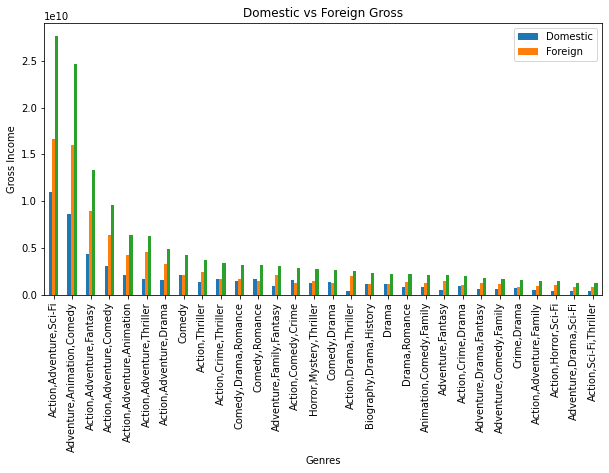

In [17]:
top_30.plot("genres", kind="bar", figsize = (10,5))

plt.xlabel("Genres")
plt.xticks(rotation = 90)
plt.ylabel("Gross Income")
plt.title("Domestic vs Foreign Gross")
plt.legend(labels=['Domestic', 'Foreign'])
plt.show()

##### Dropping to total_gross column on the top 30 for a nicer visualization

In [18]:
top_30.drop(["total_gross"], axis = 1, inplace = True)

C:\Users\qsencenbaugh\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


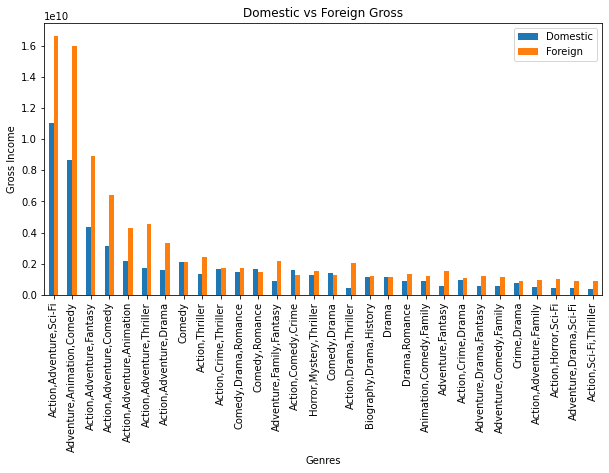

In [19]:
top_30.plot("genres", kind="bar", figsize = (10,5))

plt.xlabel("Genres")
plt.xticks(rotation = 90)
plt.ylabel("Gross Income")
plt.title("Domestic vs Foreign Gross")
plt.legend(labels=['Domestic', 'Foreign'])
plt.show()